# Fairness Check of a Coin Using Bayesian Methods

## 1) Finding Coin is Fair or Fake with Prior 0.5*Beta(20,3)+0.5*Beta(3,20)

In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
from scipy.special import gamma

$\pi_{1}|m=fair\Rightarrow  \pi_{1}=0.5 $

$\pi_{1}|m=fake\Rightarrow  \pi_{1}=0.5* \beta(20,3)+0.5*\beta(3,20) $

Not Fake:

$P(X|m) = \int d\pi_{1}p(X|\pi_{1})\delta(\pi_{1}-0.5)$

$=\prod_{n=1}^{N}(\frac{1}{2})^{x^{(n)}}*(\frac{1}{2})^{x^{(1-n)}}=(\frac{1}{2})^{N}$

Fake:

$P(X|m) = \int d\pi_{1}*p(\pi_{1})*\prod_{n=1}^{N}p(x^{(n)}|\pi_{1})$

$=d\pi_{1}(\prod_{n=1}^{N}(1-\pi_{1})^{(1-x^{n})}*\pi_{1}^{x^{n}})*0.5(\beta(20,3)+\beta(3,20))$

$=\frac{\Gamma_(23)}{\Gamma_(20)*\Gamma_(3)}*(\frac{\Gamma_(n_{1}+20)*\Gamma_(n_{2}+3)}{\Gamma_(n_{1}+n_{2}+23}+\frac{\Gamma_(n_{1}+3)*\Gamma_(n_{2}+20)}{\Gamma_(n_{1}+n_{2}+23})*0.5$

We will evaluate using log-odds:

$l(X)=log\big(\frac{P(X|m=fair)}{P(X|m=fake)}\big)$

if $l(X)>0$, coin is fair

if $l(X)<0$, coin is fake

In [2]:
def log_odds(n1,n2):
    p0 = (0.5)**(n1+n2)
    p1 = 0.5*(gamma(23)/(gamma(20)*gamma(3)))*((gamma(n1+20)*gamma(n2+3)/gamma(n1+n2+23))+(gamma(n1+3)*gamma(n2+20)/gamma(n1+n2+23)))
    return np.log(p0)-np.log(p1)
print 'n1=3,n2=5: ', log_odds(3,5)
print 'n1=5,n2=5: ', log_odds(5,5)
print 'n1=1,n2=1: ', log_odds(1,1)
print 'n1=6,n2=1: ', log_odds(6,1)
print 'n1=1,n2=6: ', log_odds(1,6)
print 'n1=1,n2=10: ', log_odds(1,100)

n1=3,n2=5:  1.72250368685
n1=5,n2=5:  2.87844690726
n1=1,n2=1:  0.832909122935
n1=6,n2=1:  -1.13641225583
n1=1,n2=6:  -1.13641225583
n1=1,n2=10:  -60.3451398208


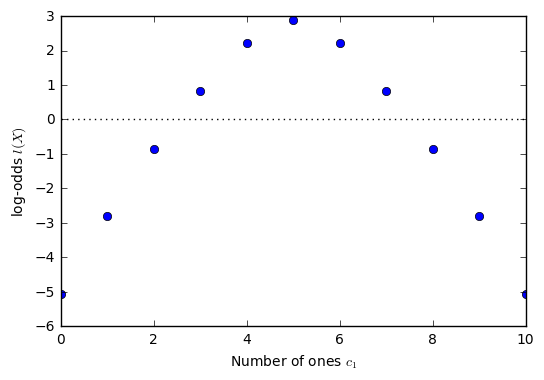

In [3]:
N = 10
l = np.zeros(N+1)
for c in range(0,N+1):
    n1 = c
    n2 = N-c
    l[c] = log_odds(n1,n2)

plt.plot(range(0,N+1), l, 'o')
plt.plot(range(0,N+1), np.zeros(N+1), 'k:')
ax = plt.gca()
ax.set_xlabel('Number of ones $c_1$')
ax.set_ylabel('log-odds $l(X)$')
plt.show()



From the plot above we can say that out of 10 trials, if there are 3,4,5,6 or 7 heads, coin is more likely to be fair. However if the number of heads are smaller than 3 or larger than 7 it means that coin is more likely to be not fair.

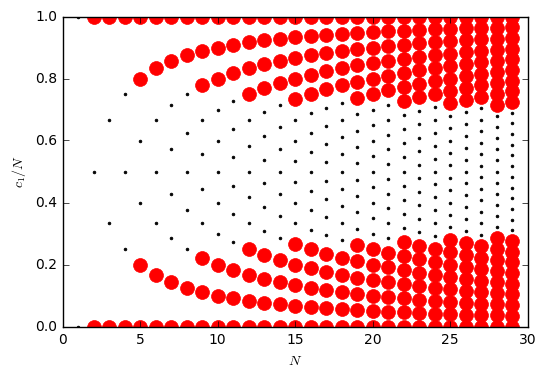

In [4]:
for N in range(1,30):

    l = np.zeros(N+1)

    for c in range(0,N+1):
        n1 = c
        n2 = N-c
        p0 = (0.5)**(n1+n2)
        p1 = 0.5*(gamma(23)/(gamma(20)*gamma(3)))*((gamma(n1+20)*gamma(n2+3)/gamma(n1+n2+23))+(gamma(n1+3)*gamma(n2+20)/gamma(n1+n2+23)))
        l[c]=np.log(p0)-np.log(p1)

    
    idx = np.where( np.array(l)<0 )
    p = np.arange(0,N+1)/float(N)
    plt.plot(N*np.ones_like(p), p, '.k',markersize=4)    
    plt.plot(N*np.ones_like(p[idx]), p[idx], '.r',markersize=20)
    

ax = plt.gca()
ax.set_ylim((0,1))
ax.set_xlabel('$N$')
ax.set_ylabel('$c_1/N$')
plt.show()

From the graph we can see that as the observation number increases fair region converges between 0.7 and 0.3, the non-fair region is more than 0.7 or less than 0.3.